# Results

You will find in this notebook the code to be executed to obtain the results in section IV of our report.

In [1]:
import library_data as data 
import library_plot as plot
import library_stats as stats
import library_stylized_facts as sf
import library_te as te 
import library_lead_lag_analysis as llr
from datetime import datetime
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## A. In-Depth Analysis of Bitcoin

### Get daily and intraday data

In [2]:
start = "2018-12-31"
btc_daily = data.get_daily("BTC-USD", start)

path_file = "data/raw/intraday_historical/BTC_intraday.csv"
btc_intraday = data.get_btc_intraday(path_file)

btc_daily, btc_intraday = data.intersection_timeframes(btc_daily, btc_intraday)

There are no NaN values in the dataframe


### Comparison of daily and intraday data

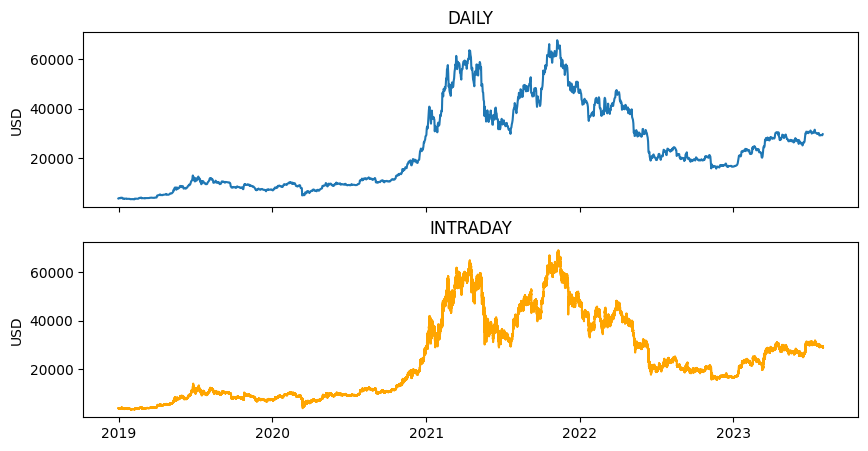

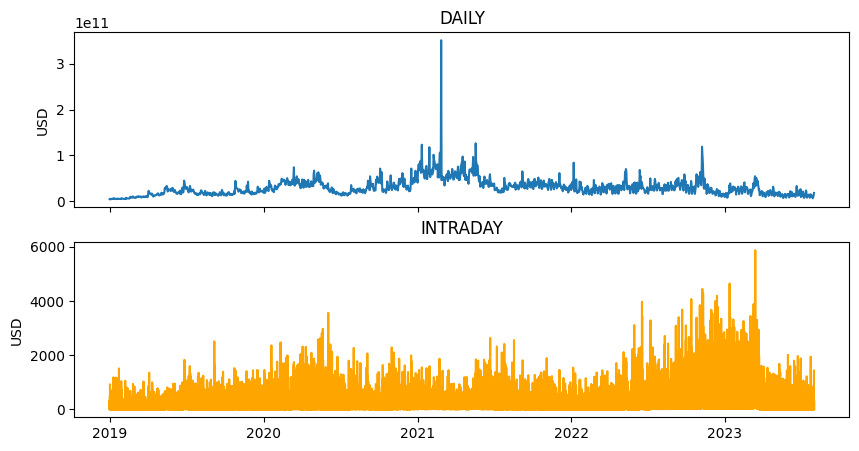

In [3]:
plot.compare_daily_intraday("Close", btc_daily, btc_intraday)
plot.compare_daily_intraday("Volume", btc_daily, btc_intraday)

### Bitcoin’s analysis

In [5]:
plot.annotated_btc(btc_daily)

### Comparison with traditional financial markets

In [6]:
stats.compare_btc_sp500_aapl(btc_daily)

----- BTC daily - Close Price -----
Mean :	 23850.59
Std:	 16477.98
Ratio :	 69.09%

----- BTC daily - Close Price -----
Mean :	 3690.68
Std:	 623.61
Ratio :	 16.90%

----- BTC daily - Close Price -----
Mean :	 115.92
Std:	 44.95
Ratio :	 38.78%



In [7]:
gspc_daily = data.get_daily("^GSPC", start)
plot.annotated_btc_sp500(btc_daily, gspc_daily)

## B. Stylized facts on Price Movements

### Get intraday data

In [8]:
cryptos = ['btc', 'ltc', 'ada', 'eth']

path_btc = "data/raw/intraday_historical/BTC_intraday.csv"
path_ltc = "data/raw/intraday_historical/LTC_intraday"
path_ada = "data/raw/intraday_historical/ADA_intraday"
path_eth = "data/raw/intraday_historical/ETH_intraday"

# Load data
df_btc = data.get_btc_intraday(path_btc)
df_ada = pd.read_parquet(path_ada)
df_ltc = pd.read_parquet(path_ltc)
df_eth = pd.read_parquet(path_eth)

#Select right timeframe for BTC 
start_date = datetime(2021, 1, 1)
end_date = datetime(2022, 1, 1)
df_btc = data.filter_timeframes(start_date, end_date, df_btc)

There are no NaN values in the dataframe


### Heavy-tailed distribution of logreturns

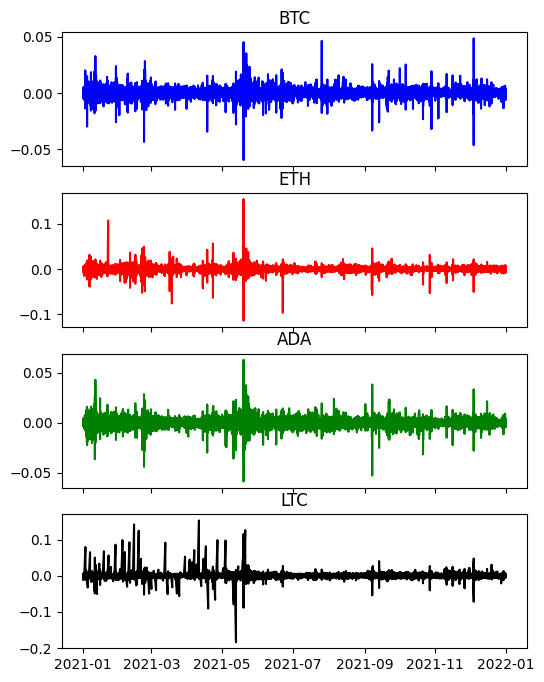

In [9]:
#Convert to logreturns 
for crypto in cryptos:
    locals()[f'df_{crypto}'] = sf.logreturns(locals()[f'df_{crypto}'], "Close")

plot.logreturns(df_btc, df_ada, df_eth, df_ltc)

#### Complementary ECDF method 

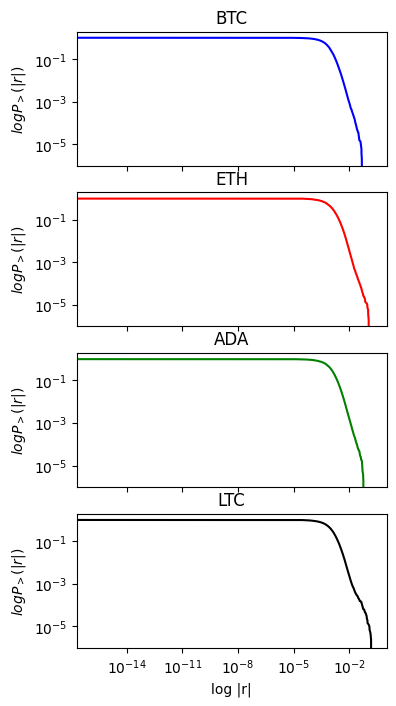

In [10]:
plot.complementary_ecdf_all(df_btc, df_ada, df_eth, df_ltc)

#### Statistical tests

In [11]:
fitted_df, distrib_df = stats.powerlaw_estimation_all(df_btc, df_ltc, df_ada, df_eth)

fitted_df

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values


,btc,ltc,ada,eth
alpha,4.378687,3.495267,3.945602,3.586190
xmin,0.000674,0.000413,0.000790,0.000624


In [12]:
distrib_df

lognormal exponential
asset index                                   
btc   z-score            -0.219303    1.729497
      p-value             0.826414     0.08372
      powerlaw favored ?     False       False
ltc   z-score             -3.77611    0.964801
      p-value             0.000159    0.334645
      powerlaw favored ?     False       False
ada   z-score            -1.057505    1.307613
      p-value             0.290281    0.191005
      powerlaw favored ?     False       False
eth   z-score             0.435731    4.308118
      p-value             0.663032    0.000016
      powerlaw favored ?     False        True

### Absence of linear autocorrelation in logreturns at different lags

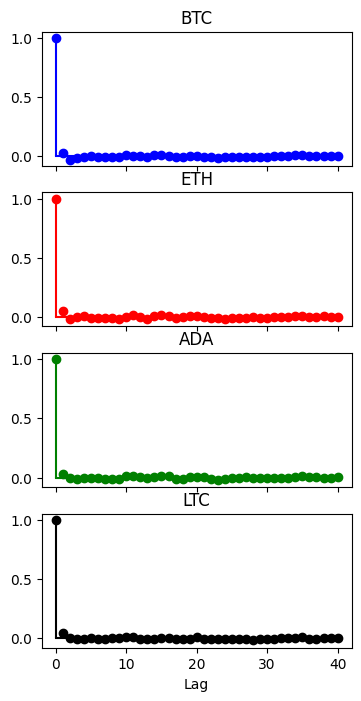

In [13]:
plot.acf(df_btc, df_ada, df_eth, df_ltc, "Logrets")

### Clustured volatility

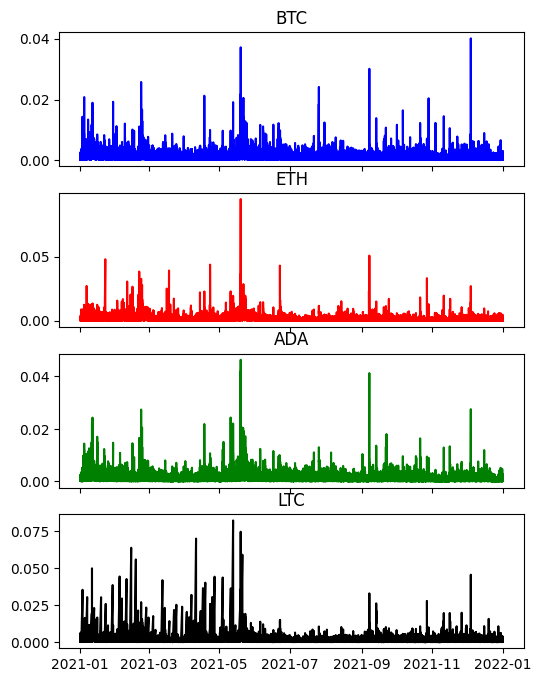

In [14]:
plot.plot_volatility(df_btc, df_ada, df_eth, df_ltc, time_window = 5)

### Long-memory of volatility

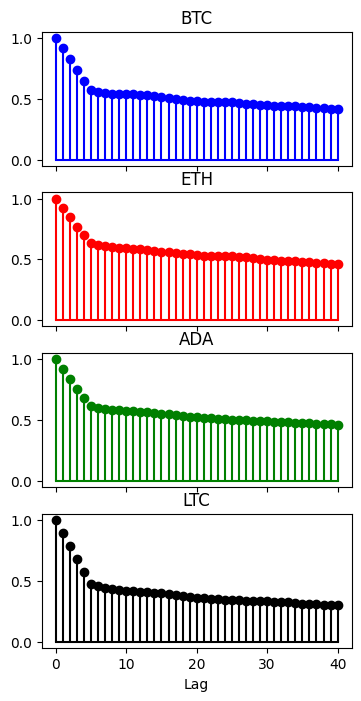

In [15]:
plot.acf_volatility(df_btc, df_ada, df_eth, df_ltc, time_window = 5)

### Response Function

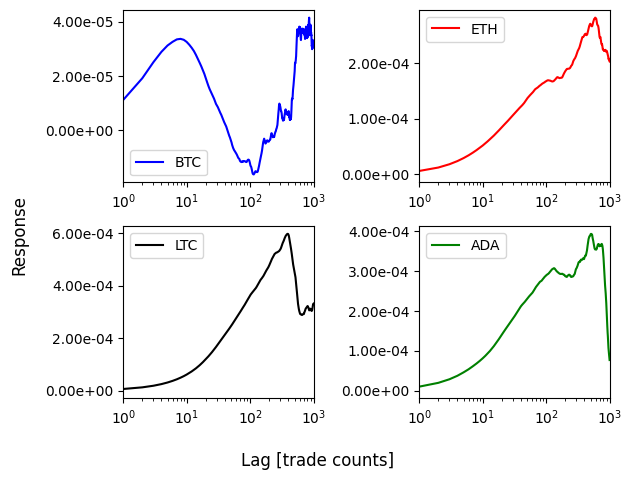

In [2]:
data_dir = "data/raw/"
plot.plot_response_plot(data_dir)

## C. Transfer Entropy from keywords to crypto logreturns.

In [2]:
#Load data
df = pd.read_parquet("data/clean/googleTrends_btc_ada_eth_ltc")
#Matching index column to name column
idx2name = {id : name for id, name in enumerate(df.columns)}

### Bivariate transfer entropy (bTE)

In [3]:
# ----- Parameters for inference -----
max_lag_sources = 4     #Change to 22 for bte2
min_lag_sources = 1     #Change to 4 for bte2
thau = 1                #Change to 6 for bte2
targets_idx = [0, 1, 2, 3]
name_file = "results_bte"

# ----- Graph inference (takes time) -----
#te.infer_graph_bTE(max_lag_sources, min_lag_sources, thau, df, targets_idx, name_file)

# ----- Load results -----
path_res = "data/clean/transfer_entropy/" + name_file + ".p"
results = te.load_results(path_res)

In [4]:
# ----- Inference results -----
res_ind = te.individual_results_all(targets_idx, results, idx2name)
res_joint = te.joint_results(results, idx2name)

# p-values for the estimated bivariate transfer entropy for significant individual links 
res_ind

Info delay        TE  P-value
Target      Source                                    
BTC_Logrets Bitcoin               4  0.026238    0.002
            btc                   3  0.028599    0.002
            Musk                  4  0.026932    0.002
            trading               4  0.019685    0.006
            Litecoin              1  0.017150    0.010
ADA_Logrets Bitcoin               4  0.020975    0.002
            btc                   3  0.023396    0.002
            Ethereum              4  0.016977    0.022
            Litecoin              1  0.015580    0.016
            Cardano               2  0.016350    0.026
ETH_Logrets LTC_Logrets           3  0.019126    0.012
            Bitcoin               4  0.025819    0.002
            btc                   4  0.046540    0.002
            Ethereum              2  0.019592    0.004
            Musk                  3  0.017782    0.016
LTC_Logrets Bitcoin               1  0.029083    0.002
            btc                   4  0.030690    0.002
            Ethereum              2  0.035463    0.002
            FED                   2  0.015778    0.026
            Litecoin              3  0.030237    0.002

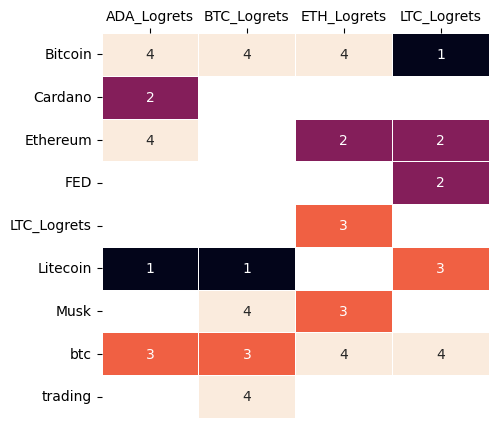

                         Info delay        TE  P-value
Target      Source                                    
BTC_Logrets Bitcoin               4  0.026238    0.002
            btc                   3  0.028599    0.002
            Musk                  4  0.026932    0.002
            trading               4  0.019685    0.006
            Litecoin              1  0.017150    0.010
ADA_Logrets Bitcoin               4  0.020975    0.002
            btc                   3  0.023396    0.002
            Ethereum              4  0.016977    0.022
            Litecoin              1  0.015580    0.016
            Cardano               2  0.016350    0.026
ETH_Logrets LTC_Logrets           3  0.019126    0.012
            Bitcoin               4  0.025819    0.002
            btc                   4  0.046540    0.002
            Ethereum              2  0.019592    0.004
            Musk                  3  0.017782    0.016
LTC_Logrets Bitcoin               1  0.029083    0.002
          

In [5]:
# Display heatmap of information delay 
path_name = "info_delay_bTE2"
te.information_delay_bte(res_ind, path_name)
print(res_ind)

## D. Lead-Lag Networks

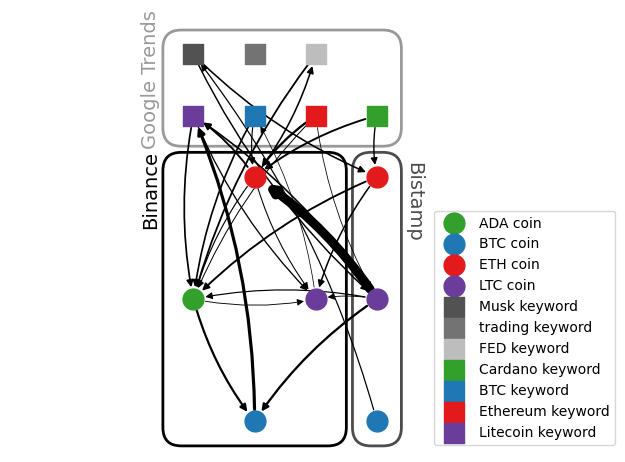

In [4]:
llr_df, minimum_statistically_significant_llr = llr.fetch_lead_lag_ratios()
graph_adjacency_matrix, significant_edges_weights, node_name_list, node_degrees = llr.llr_plot(llr_df, "2021-01-01",threshold = minimum_statistically_significant_llr)

 HALF CLUSTER  Lc.new > max(Lc.old)
 HALF CLUSTER  Lc.new > max(Lc.old)
Lc.new <= max(Lc.old), exiting


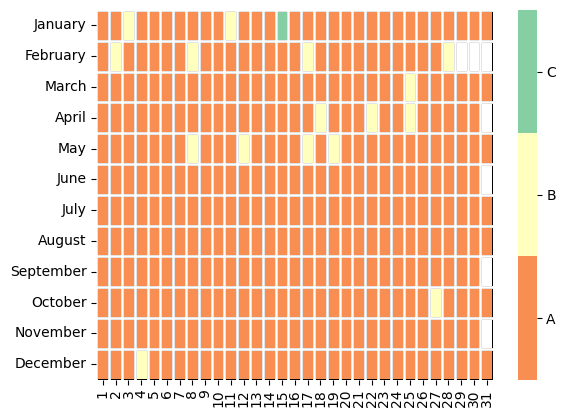

<Figure size 640x480 with 0 Axes>

In [5]:
llr.plot_giada_marsili_clustering(RMT_corrected=True)